**Basic stats - 2**

In [13]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Given data Set
data = np.array([1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29])
print(data)

[1.13 1.55 1.43 0.92 1.25 1.36 1.32 0.85 1.07 1.48 1.2  1.33 1.18 1.22
 1.29]


**Sample Statistics Caculation**

In [3]:
# Sample Mean
sampleMean = np.mean(data)
sampleMean

1.2386666666666666

In [4]:
# Sample standard deviation
sample_std = np.std(data, ddof=1)
sample_std

0.19316412956959936

In [5]:
# Sample Size
n = len(data)
n

15

**Build 99% Confidence Interval Using Sample Standard Deviation**

In [6]:
# Confidence level
confidence_level = 0.99
alpha = 1 - confidence_level    #significant level
alpha

0.010000000000000009

In [7]:
# Calculate the critical value (t*)
t_critical = t.ppf(1 - alpha/2, df=n-1)
t_critical

2.97684273411266

In [8]:
# Calculate margin of error
marginError = t_critical * (sample_std/np.sqrt(n))
marginError

0.1484693282152996

In [9]:
# Construct the confidence interval
confidence_interval_sample_std = (sampleMean - marginError, sampleMean + marginError)
print("99% Confidence Interval Using Sample Standard Deviation:", confidence_interval_sample_std)

99% Confidence Interval Using Sample Standard Deviation: (1.090197338451367, 1.3871359948819662)


**b. Build 99% Confidence Interval Using Known Population Standard Deviation:**

In [10]:
population_std = 0.2
# Calculate the critical value (z*)
z_critical = norm.ppf(1 - alpha/2)
z_critical

2.5758293035489004

In [11]:
# Calculate the margin of error
marginError_known_std  = z_critical * (population_std / np.sqrt(n))
marginError_known_std

0.13301525327090588

In [12]:
# Construct the confidence interval
confidence_interval_known_std = (sampleMean - marginError_known_std, sampleMean + marginError_known_std)
print("99% Confidence Interval Using Known Population Standard Deviation:", confidence_interval_known_std)

99% Confidence Interval Using Known Population Standard Deviation: (1.1056514133957607, 1.3716819199375725)


<ipython-input-17-b57091429076>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color="blue")


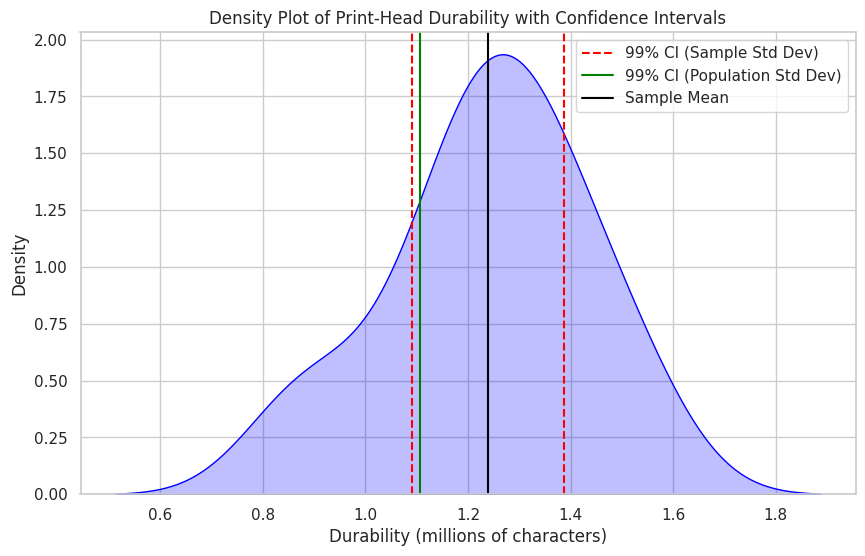

In [17]:
# Plot density plot
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.kdeplot(data, shade=True, color="blue")

# Plot confidence intervals
plt.axvline(confidence_interval_sample_std[0], color='red', linestyle='--', label='99% CI (Sample Std Dev)')
plt.axvline(confidence_interval_sample_std[1], color='red', linestyle='--')
plt.axvline(confidence_interval_known_std[0], color='green', linestyle='-', label='99% CI (Population Std Dev)')
#Plot Mean
plt.axvline(sampleMean, color='black', linestyle='-', label='Sample Mean')
# Lable and Title
plt.title('Density Plot of Print-Head Durability with Confidence Intervals')
plt.xlabel('Durability (millions of characters)')
plt.ylabel('Density')
plt.legend()
plt.show()